#Import Library



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 Dataset


In [4]:
df = pd.read_csv('/content/SuperStore.csv')
df.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


In [5]:
df.isnull().sum()

Order_ID          0
Customer_ID       0
Postal_Code       0
Product_ID        0
Sales             0
Quantity          0
Discount          0
Profit            0
Category          0
Sub-Category      0
Product_Name      0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
Country/Region    0
City              0
State             0
Region            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        9994 non-null   object 
 1   Customer_ID     9994 non-null   object 
 2   Postal_Code     9994 non-null   int64  
 3   Product_ID      9994 non-null   object 
 4   Sales           9994 non-null   float64
 5   Quantity        9994 non-null   int64  
 6   Discount        9994 non-null   float64
 7   Profit          9994 non-null   float64
 8   Category        9994 non-null   object 
 9   Sub-Category    9994 non-null   object 
 10  Product_Name    9994 non-null   object 
 11  Order_Date      9994 non-null   object 
 12  Ship_Date       9994 non-null   object 
 13  Ship_Mode       9994 non-null   object 
 14  Customer_Name   9994 non-null   object 
 15  Segment         9994 non-null   object 
 16  Country/Region  9994 non-null   object 
 17  City            9994 non-null   o

In [9]:
# Converting format time
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

In [10]:
df.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


 Exploratory Data Analysis

In [11]:
# Menghitung Total Sales dari Category Product
# Menghitung Total Sales dari Category Product
pd.pivot_table(
    data=df,
    index='Category',
    values='Sales',
    aggfunc='sum'
)

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


In [12]:
# Menghitung Total Sales dari Category Product berdasarkan Daerah
pd.pivot_table(
    data=df,
    index='Category',
    columns='Region',
    values='Sales',
    aggfunc='sum'
)

Region,Central,East,South,West
Category,,,,
Furniture,163797.1638,208291.204,117298.684,252612.7435
Office Supplies,167026.4150,205516.055,125651.313,220853.2490
Technology,170416.3120,264973.981,148771.908,251991.8320


In [13]:
# Menghitung Total Sales dari Category Product berdasarkan Daerah
pd.pivot_table(
    data=df,
    index='Category',
    columns=['Region','Segment'],
    values='Sales',
    aggfunc='sum'
)

Region             Central                                East             \
Segment           Consumer   Corporate Home Office    Consumer  Corporate   
Category                                                                    
Furniture        86229.219  52085.6018   25482.343  114211.802  64209.046   
Office Supplies  93111.479  41137.7010   32777.235  101255.136  66474.735   
Technology       72690.736  64772.5100   32953.066  135441.229  69725.566   

Region                           South                                West  \
Segment         Home Office   Consumer   Corporate Home Office    Consumer   
Category                                                                     
Furniture         29870.356  70800.204  29645.0315  16853.4485  119808.087   
Office Supplies   37786.184  59504.581  45930.1700  20216.5620  110080.940   
Technology        59807.186  65276.186  46310.7310  37184.9910  132991.746   

Region                                   
Segment           Corporate Home Office  
Category                                 
Furniture        83080.1065   49724.550  
Office Supplies  77133.8560   33638.453  
Technology       65641.3120   53358.774

Visualizing Data

In [14]:
# Preparing Data
data = pd.pivot_table(
    data=df
    ,index='Order_Date'
    ,values='Sales'
    ,aggfunc='sum'
).reset_index()

data.head()

,Order_Date,Sales
0,2017-01-03,16.448
1,2017-01-04,288.060
2,2017-01-05,19.536
3,2017-01-06,4407.100
4,2017-01-07,87.158


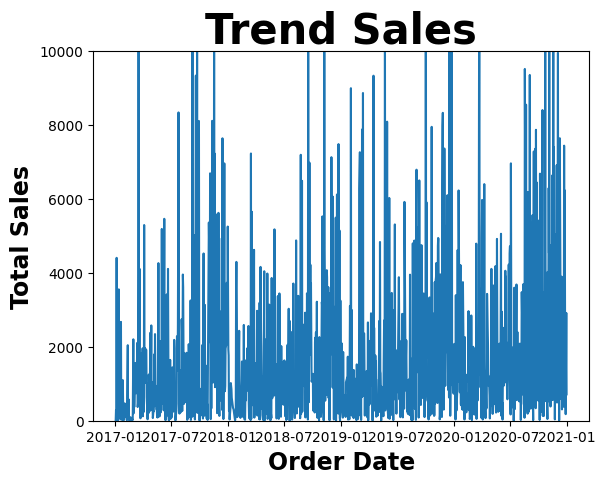

In [15]:
# Create Line Plot
'''
sns.lineplot(data=data,x='Order_Date',y='Sales')
'''
ax = sns.lineplot(data=data,x='Order_Date',y='Sales')
ax.set_title('Trend Sales',fontdict={'size':30, 'weight':'bold'})
ax.set_xlabel('Order Date',fontdict={'size':17, 'weight':'bold'})
ax.set_ylabel('Total Sales',fontdict={'size':17, 'weight':'bold'})
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("whitegrid")
plt.ylim(0,10000)
plt.savefig('line_plot.png')

Multi-Line Chart
Melihat Total Sales dari Hari ke Harinya Berdasarkan kategori besar products

In [16]:
# Preparing Data
data = pd.pivot_table(
    data=df
    ,index=['Order_Date','Category']
    ,values='Sales'
    ,aggfunc='sum'
).reset_index()

data.head()

,Order_Date,Category,Sales
0,2017-01-03,Office Supplies,16.448
1,2017-01-04,Office Supplies,288.060
2,2017-01-05,Office Supplies,19.536
3,2017-01-06,Furniture,2573.820
4,2017-01-06,Office Supplies,685.340


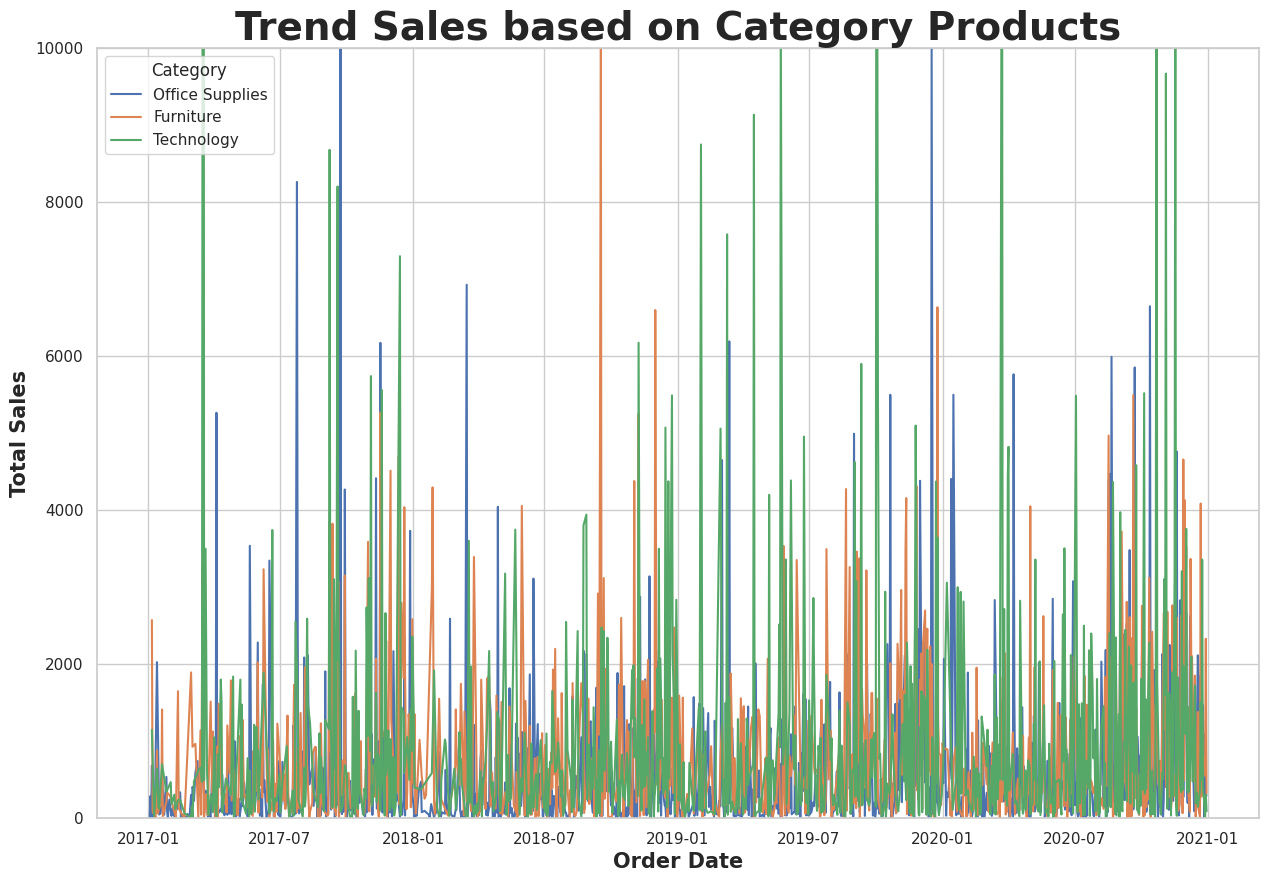

In [17]:
# Create MultiLine Plot

'''
sns.lineplot(data=data,x='Order_Date',y='Sales', hue='Category')
'''
ax = sns.lineplot(data=data,x='Order_Date',y='Sales', hue='Category')
ax.set_title('Trend Sales based on Category Products',fontdict={'size':28, 'weight':'bold'})
ax.set_xlabel('Order Date',fontdict={'size':15, 'weight':'bold'})
ax.set_ylabel('Total Sales',fontdict={'size':15, 'weight':'bold'})
plt.ylim(0,10000)
plt.savefig('multiline_plot.png')

 Bar Chart
Membandingkan total penjualan berdasarkan segmen pelanggan

In [18]:
# Preparing Data
data = pd.pivot_table(
    data=df
    ,index='Segment'
    ,values='Sales'
    ,aggfunc='sum'
).reset_index()
data.head()

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


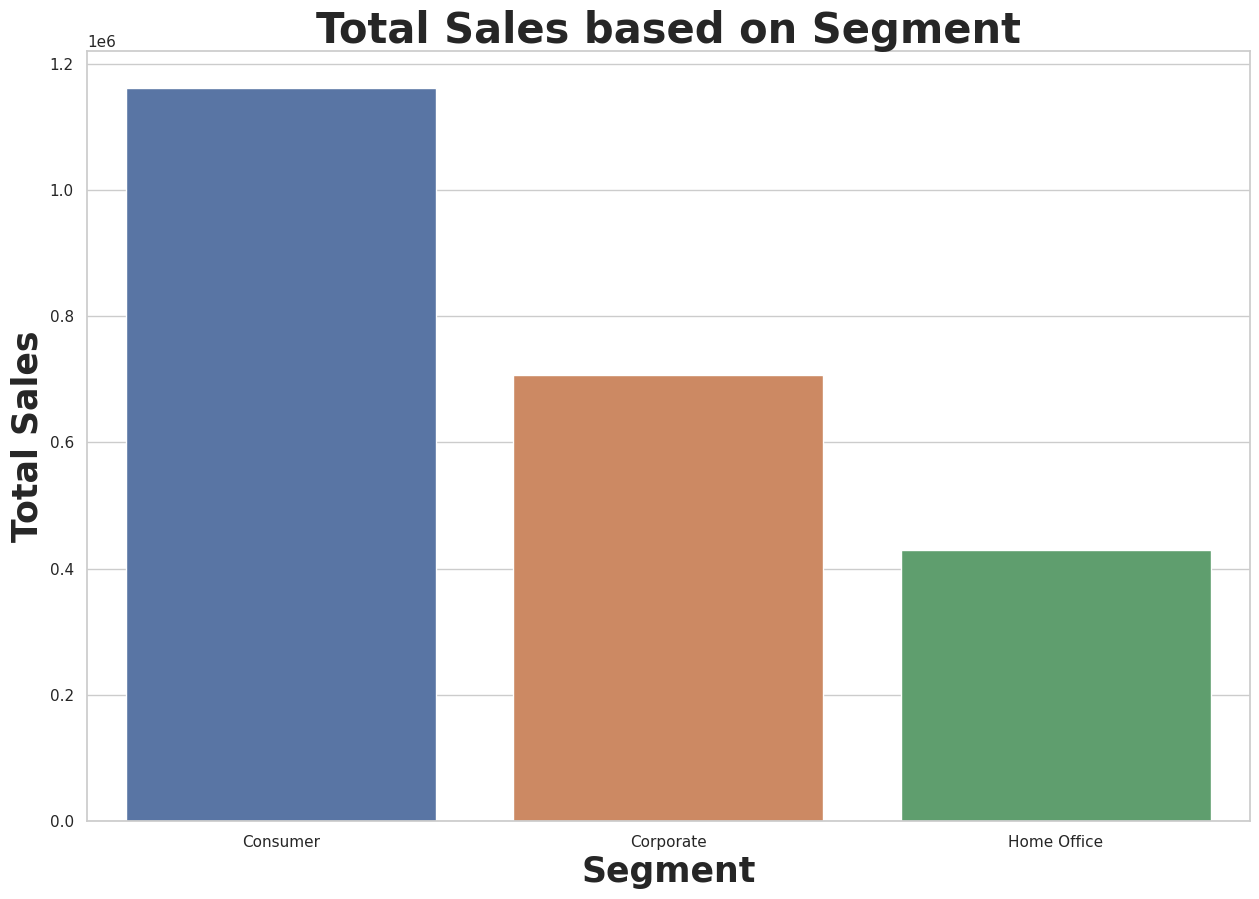

In [20]:
# B. Create Bar Plot
'''
sns.barplot(data=data, x='Segment', y='Sales')
'''
ax = sns.barplot(data=data, x='Segment', y='Sales')
ax.set_title('Total Sales based on Segment',fontdict={'size':30, 'weight':'bold'})
ax.set_xlabel('Segment',fontdict={'size':25, 'weight':'bold'})
ax.set_ylabel('Total Sales',fontdict={'size':25, 'weight':'bold'})
plt.savefig('bar_plot.png')


Membandingkan total penjualan berdasarkan segmen pelanggan dan Asal Customer

In [21]:
# Preparing Data
data = pd.pivot_table(
    data=df
    ,index=['Segment','Region']
    ,values='Sales'
    ,aggfunc='sum'
).reset_index()
data.head()

,Segment,Region,Sales
0,Consumer,Central,252031.4340
1,Consumer,East,350908.1670
2,Consumer,South,195580.9710
3,Consumer,West,362880.7730
4,Corporate,Central,157995.8128


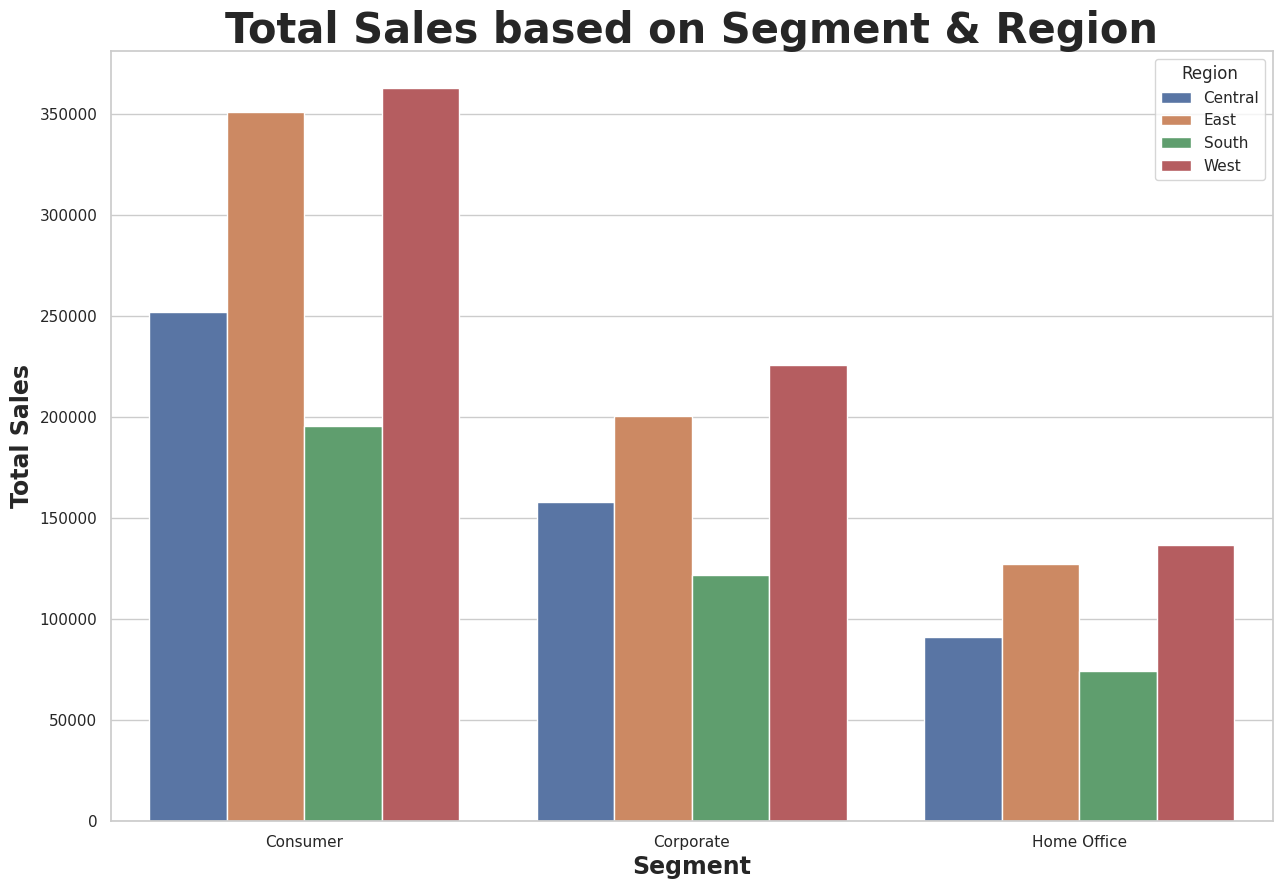

In [22]:
# Create Bar Plot
'''
sns.barplot(data=data, x='Segment', y='Sales', hue='Region')
'''
ax = sns.barplot(data=data, x='Segment', y='Sales', hue='Region')
ax.set_title('Total Sales based on Segment & Region',fontdict={'size':30, 'weight':'bold'})
ax.set_xlabel('Segment',fontdict={'size':17, 'weight':'bold'})
ax.set_ylabel('Total Sales',fontdict={'size':17, 'weight':'bold'})
plt.savefig('multibar_plot.png')

 Scatter Plot

Melihat Hubungan antara sales & profit

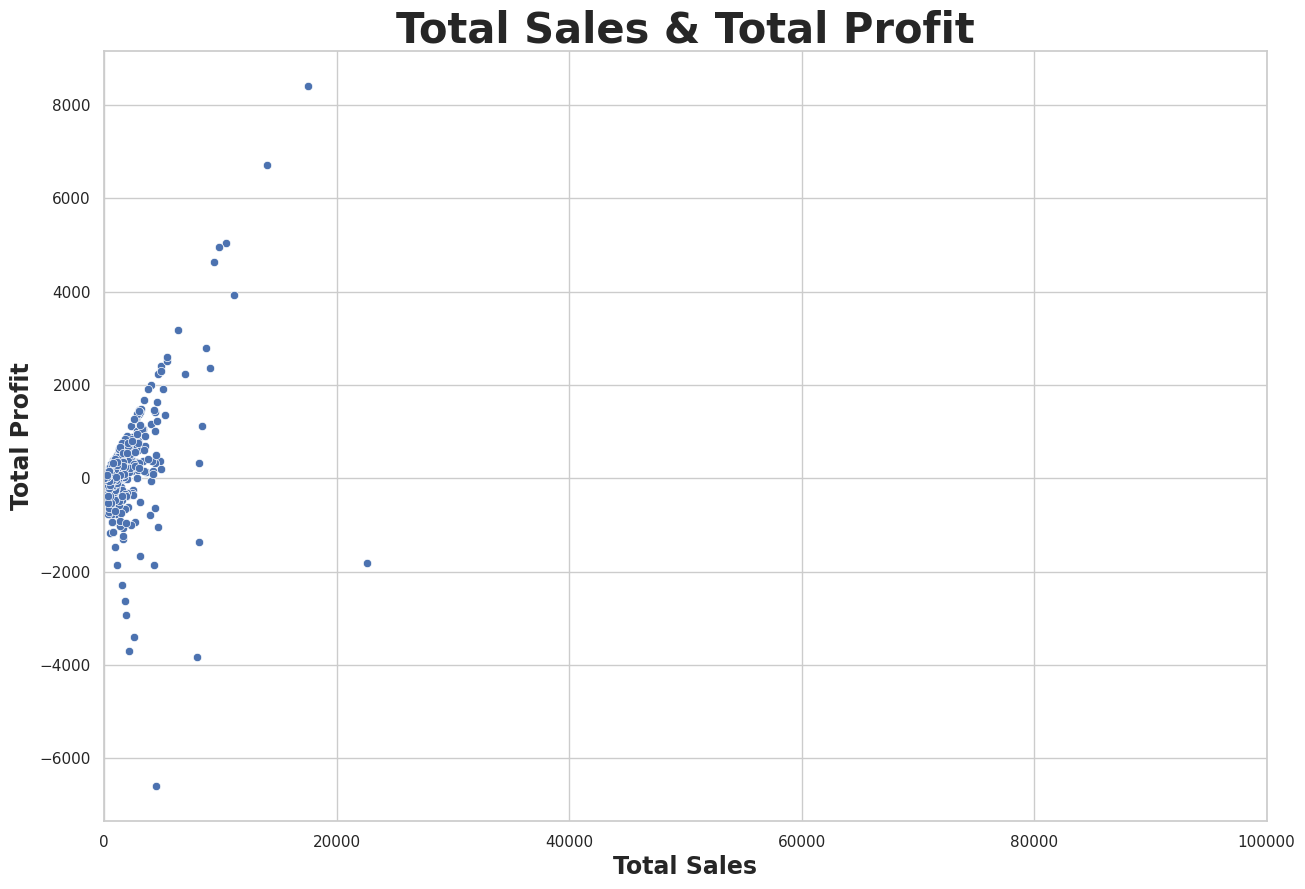

In [23]:
# Create Scatter Plot
ax = sns.scatterplot(data=df,x='Sales',y='Profit')
ax.set_title('Total Sales & Total Profit',fontdict={'size':30, 'weight':'bold'})
ax.set_xlabel('Total Sales',fontdict={'size':17, 'weight':'bold'})
ax.set_ylabel('Total Profit',fontdict={'size':17, 'weight':'bold'})
plt.xlim(0,100000)
plt.savefig('scatter_plot.png')

Melihat Hubungan antara sales & profit berdasarkan segment

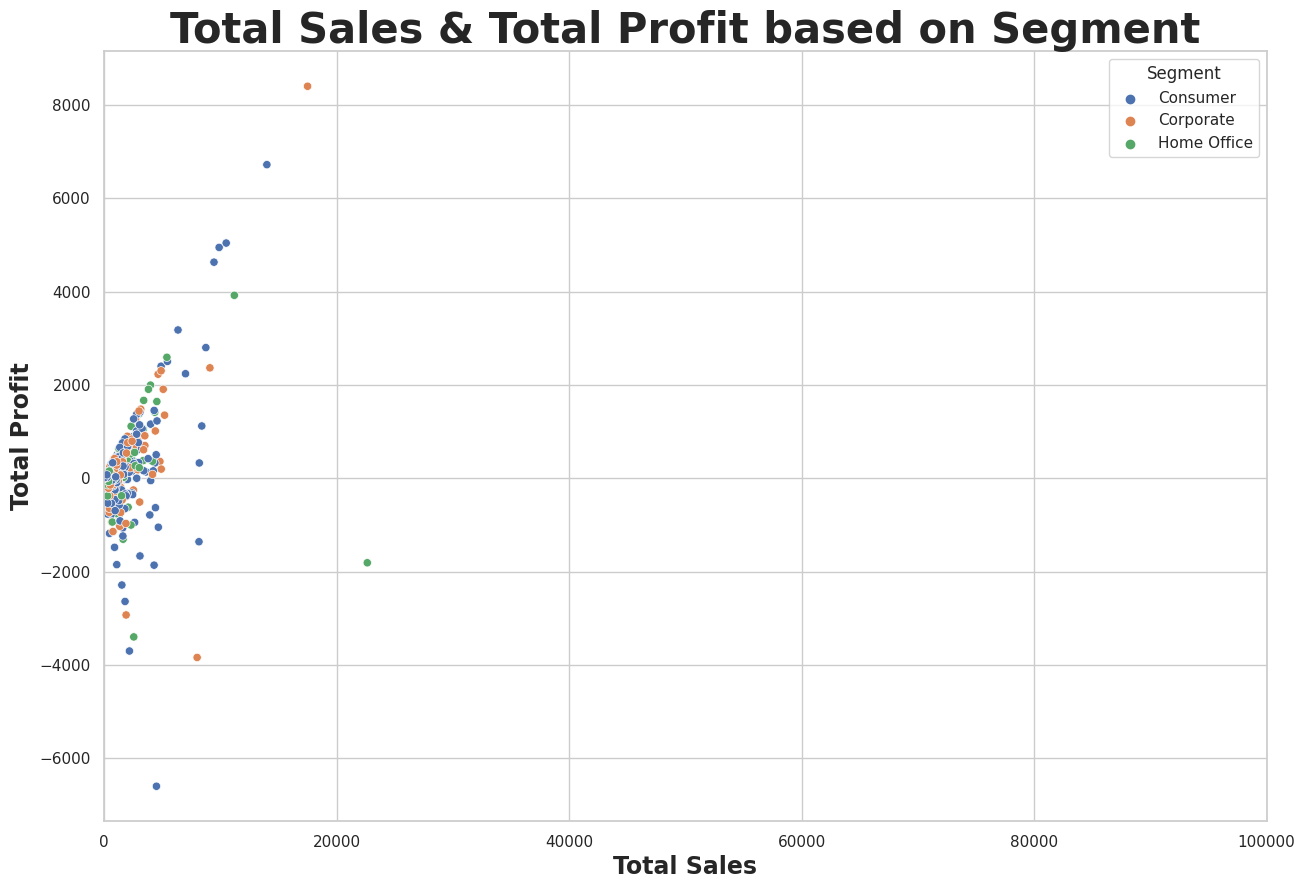

In [24]:
# Create Scatter Plot
ax = sns.scatterplot(data=df,x='Sales',y='Profit', hue='Segment')
ax.set_title('Total Sales & Total Profit based on Segment',fontdict={'size':30, 'weight':'bold'})
ax.set_xlabel('Total Sales',fontdict={'size':17, 'weight':'bold'})
ax.set_ylabel('Total Profit',fontdict={'size':17, 'weight':'bold'})
plt.xlim(0,100000)
plt.savefig('scatter_plot2.png')

HeatMap

In [25]:
# Prepare Data
data = pd.pivot_table(
    data=df
    ,index='State'
    ,columns='Category'
    ,values='Sales'
    ,aggfunc='sum'
)
data.head()

Category,Furniture,Office Supplies,Technology
State,,,
Alabama,6332.4800,4209.080,8969.080
Arizona,13525.2910,10005.825,11750.885
Arkansas,3187.5500,4565.330,3925.250
California,156064.6015,142351.948,159271.082
Colorado,13243.0370,7898.752,10966.329


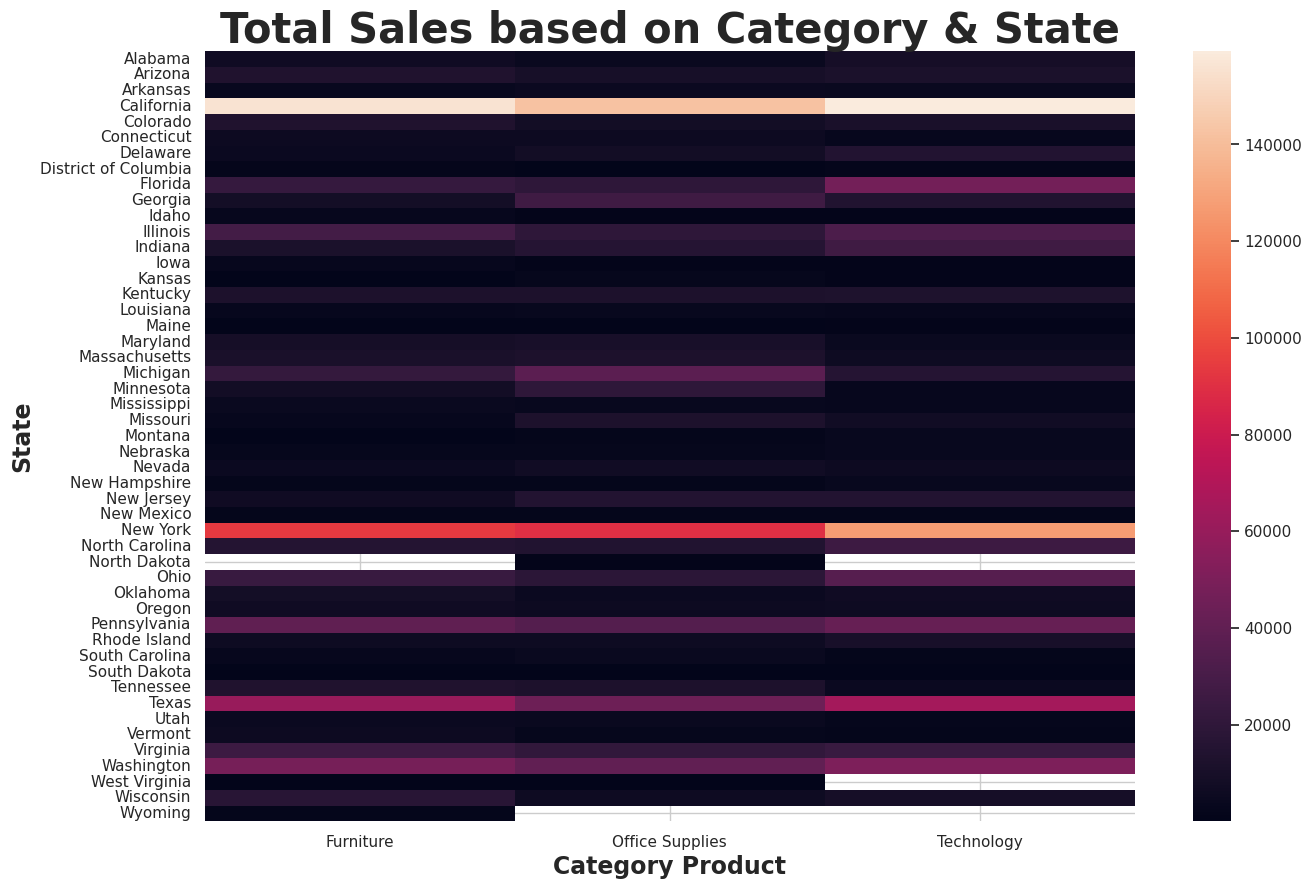

In [26]:
# Create HeatMap
ax = sns.heatmap(data)
ax.set_title('Total Sales based on Category & State',fontdict={'size':30, 'weight':'bold'})
ax.set_xlabel('Category Product',fontdict={'size':17, 'weight':'bold'})
ax.set_ylabel('State',fontdict={'size':17, 'weight':'bold'})
plt.savefig('heatmap.png')